In [264]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic = sns.load_dataset("titanic")

In [229]:
# notnull()를 통해 결측치 배제
titanic = titanic[titanic["age"].notnull()]
titanic["adult_female"] = titanic.apply( lambda x: "True" if x.age >= 20 and x.sex == "female" else False, axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False


In [254]:
# dropna()를 통해 결측치 배제
titanic.dropna(subset=["age"], inplace=True)        # titanic.count에서 확인한 결측치를 제외한 데이터 갯수대로 뽑아냄.
titanic['adult_female'] = (titanic["sex"] == 'female') & (titanic['age'] >= 0)
titanic['adult_female']

0      False
1       True
2       True
3       True
4      False
       ...  
885     True
886    False
887     True
889    False
890    False
Name: adult_female, Length: 714, dtype: bool

In [231]:
# [연습문제]
titanic.to_csv("titanic_age.csv", index=False)
titanic_read = pd.read_csv("titanic_age.csv")
titanic_read

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult_female
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,True
710,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,False
711,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,False
712,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,False


In [265]:
# [연습문제]
# groupby() : index에 올 기준을 입력한 후, 연산처리 하면 Series 형태로 출력
titanic
titanic_survived_per = pd.DataFrame(titanic.groupby('pclass').mean()['survived'])
titanic_survived_per

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [266]:
titanic
titanic[["pclass", "survived"]].groupby("pclass").mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [270]:
# [연습문제]
titanic[["sex", 'survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


## 한글 폰트 사용하기 - 외부 폰트 사용하기

    1. font_dir : 경로 지정
    2. mpl.rcParams['font.family'] = '폰트 명.otf'

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.family'] = 'NanumGothic'

In [26]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/IPython']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Kyobo Handwriting 2021'
print(mpl.rcParams['font.family'])

NanumGothicOTF
Kyobo Handwriting 2021
['Kyobo Handwriting 2021']


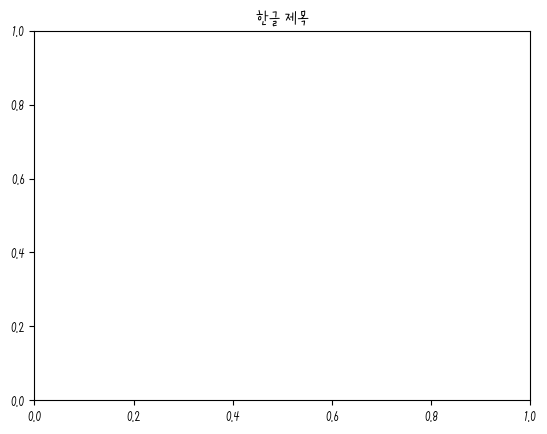

In [27]:
plt.title("한글 제목")
plt.show()

## 한글 폰트 사용하기 - 개별 폰트 설정하기

    1. dict

## Unicode nimus 표기법 설정

    1. 음수 부호를 유니코르 또는 ASC2

In [29]:
mpl.rc('axes', unicode_minus=False)

## Axes 

    - Axes는 데이터 플로팅을 위한 영역
    - Axis는 ticks와 tick labels을 제공하며, 
    - Axes와 Axis는 다른 객체이므로 잘 구분해서 봐야 함.

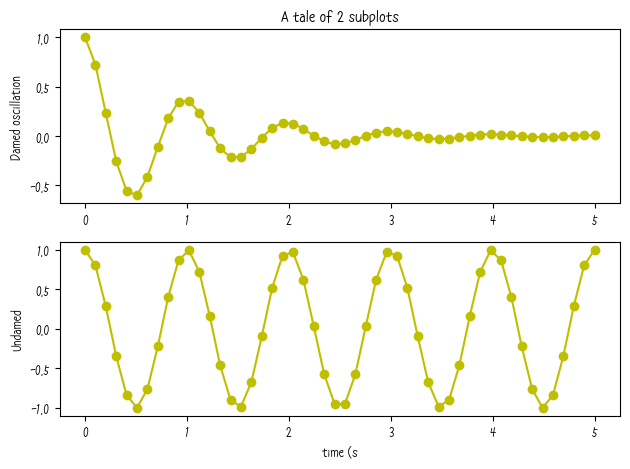

In [32]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2,1,1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damed oscillation')

ax2 = plt.subplot(2,1,2)
plt.plot(x2, y2, 'yo-')
plt.xlabel('time (s')
plt.ylabel('Undamed')

plt.tight_layout()          # tight_layout() 명령을 실행하면 플롯 간의 간격을 자동으로 맞춰줌.
plt.show()

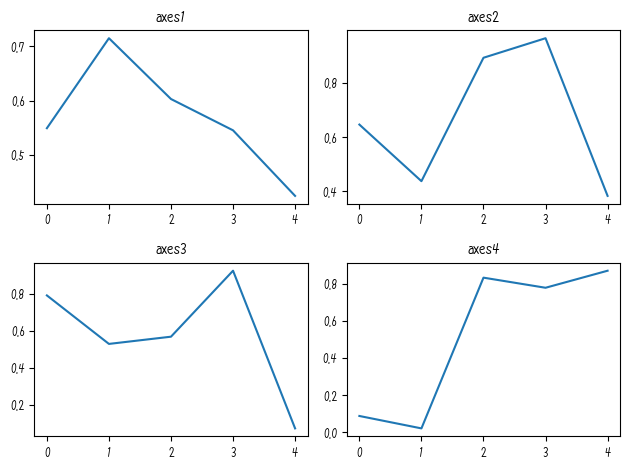

In [34]:
# 2x2 형태의 4개의 플롯
np.random.seed(0)

plt.subplot(221)                # 행,열,순서
plt.plot(np.random.rand(5))
plt.title('axes1')

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title('axes2')

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title('axes3')

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title('axes4')

plt.tight_layout()
plt.show()

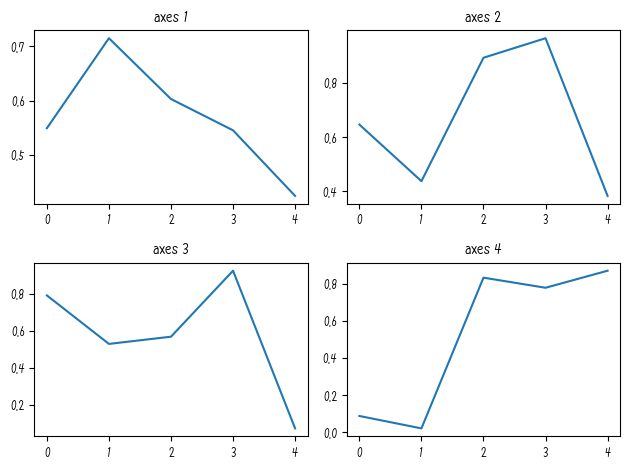

In [36]:
# 2x2 ndarray의 형태
fig, axes = plt.subplots(2,2)

np.random.seed(0)
axes[0,0].plot(np.random.rand(5))
axes[0,0].set_title("axes 1")
axes[0,1].plot(np.random.rand(5))
axes[0,1].set_title("axes 2")
axes[1,0].plot(np.random.rand(5))
axes[1,0].set_title("axes 3")
axes[1,1].plot(np.random.rand(5))
axes[1,1].set_title("axes 4")

plt.tight_layout()
plt.show()

## Axis

    - 하나의 Axes 객체는 두 개 이상의 Axis 객체를 가짐.
    - Axis 객체는 ticks(축의 표시)과 ticklabels(눈금 레이블을 지정하는 문자열)에 대한 규모와 제한을 설정

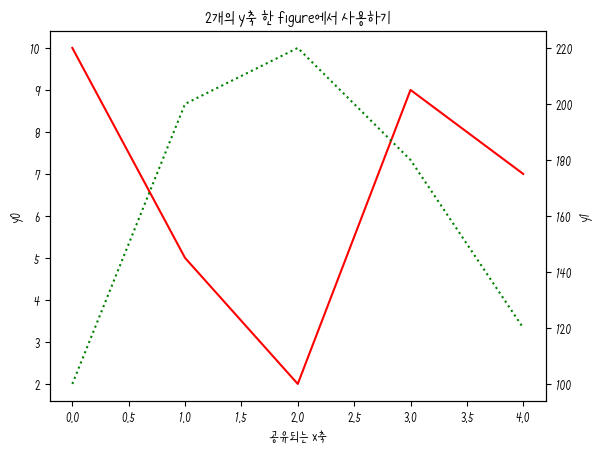

In [38]:
# twins(): x축 양쪽
fig, ax0 =plt.subplots()
ax1 = ax0.twinx()
ax0.set_title("2개의 y축 한 figure에서 사용하기")
ax0.plot([10,5,2,9,7], 'r-', label='y0')
ax0.set_ylabel('y0')
ax0.grid(False) 
ax1.plot([100,200,220,180,120], 'g:', label='y1')
ax1.set_ylabel('y1')
ax1.grid(False)
ax0.set_xlabel('공유되는 x축')
plt.show()

## Aritist

    - Figure에 보이는 모든 것들
    - Figure, Axes, Axis, Text객체, ...

## 바 차트(Bar Chart)

    - bar 명령과 barch 명령으로 시각화

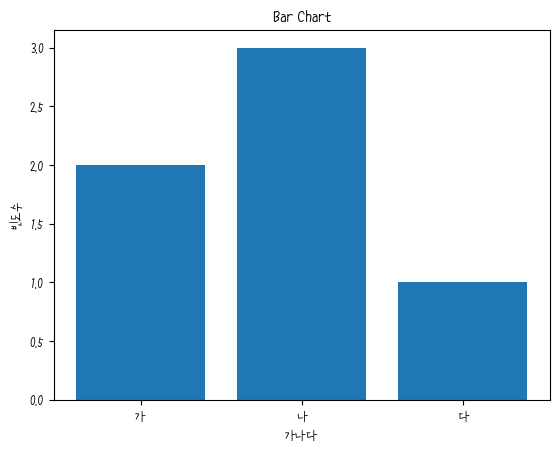

In [40]:
# 바 차트 - bar 명령
y= [2,3,1]
x=['가','나','다']
plt.title('Bar Chart')
plt.bar(x,y)            # bar명령
plt.xlabel('가나다')     # x축 label
plt.ylabel('빈도수')     # y축 label
plt.show()

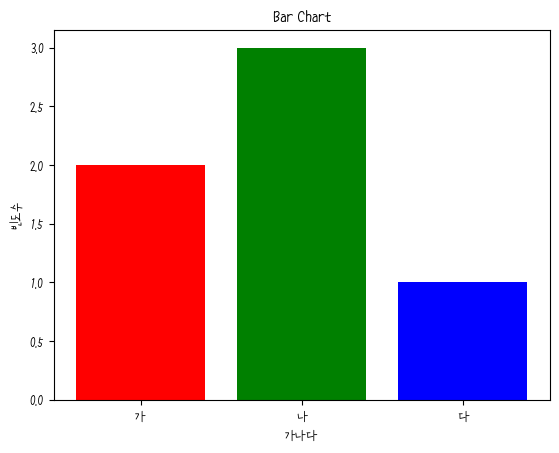

In [43]:
# 바 차트 - 색 설정
y= [2,3,1]
x=['가','나','다']
colors = ['red', 'green','blue']

plt.title('Bar Chart')
plt.bar(x,y, color=colors)      # bar명령
plt.xlabel('가나다')
plt.ylabel('빈도수')
plt.show()

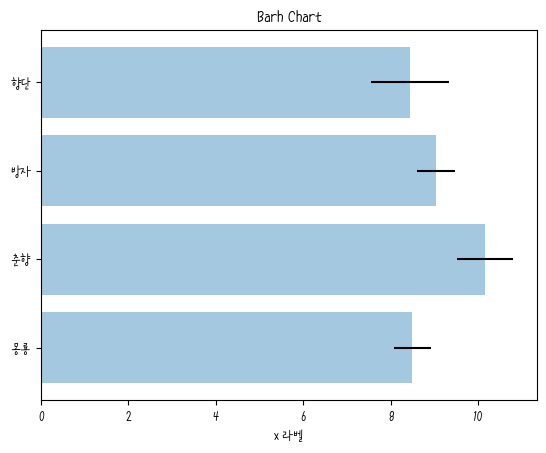

In [45]:
# 바 차트 - 에러 바 추가
np.random.seed(0)
people = ['몽룡', '춘향', '방자', '향단']
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(people, performance, xerr=error, alpha=0.4)        # xerr=error : square 영역에 라인 표시 / alpha : 투명도 지정(0은 완전 투명, 1은 완전 불투명)
plt.xlabel('x 라벨')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

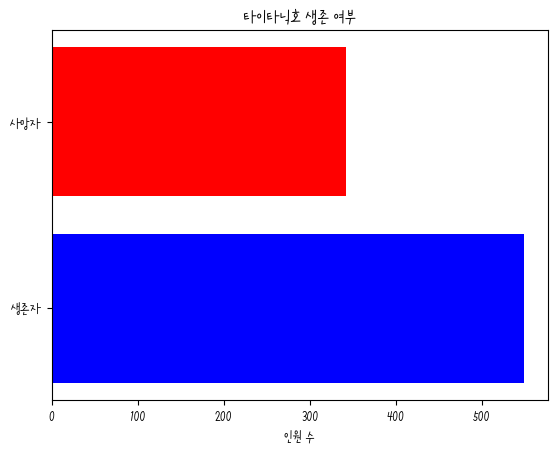

In [82]:
# [연습문제]
x = ['생존자', '사망자']
y = titanic['alive'].value_counts().values      # .values : array형태의 값만 출력
colors = ['blue', 'red']
plt.title('타이타닉호 생존 여부')
plt.xlabel('인원 수')
plt.barh(x,y, color=colors)
plt.show


In [ ]:
# [연습문제]
bar_chart = titanic['alive'].value_counts()
bar_chart.rename

plt.title('타이타닉호 생존 여부')
plt.xlabel('인원 수')
plt.barh(x,y, color=bar_colors)
plt.show

## 파이 차트(Pie Chart)

    - 카테고리 별 값의 상대적인 비교를 해야 할때
    - autopct : 값을 어떻게 표현할지('%1.1f%%' => 1 : 들여쓰기? / 1f : 실수를 소수점 첫째자리까지 / %% : 단위 %)
    - statangle : 시작 각도

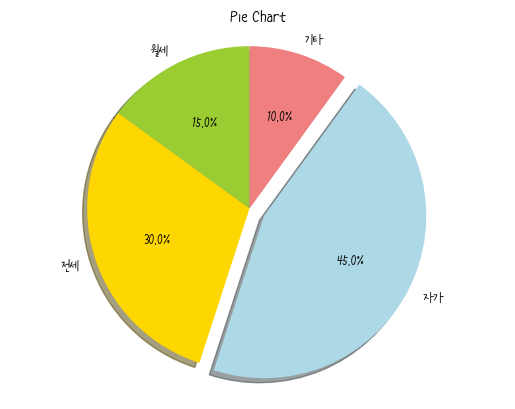

In [91]:
labels = ['월세','전세','자가','기타']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral']
explode = (0,0,0.1,0)       # 간격
plt.title('Pie Chart')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')   # 원의 형태 유지
plt.show()

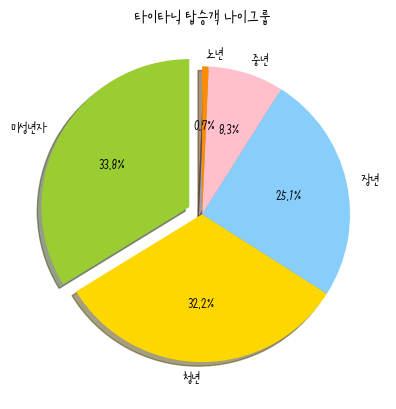

In [168]:
# [연습문제] -- 미성년자와 장년이 바뀌어야 함.
bins = [0,20,30,50,70,100]
labels = ["미성년자", "청년", "장년", "중년", "노년"]

titanic.dropna(subset=['age'], inplace=True)
age_group = pd.cut(titanic['age'], bins=bins, labels=labels).value_counts()      # value_counts(): 카테고리 별 갯수 

explode = (0.1, 0, 0, 0, 0)
colors = ["yellowgreen", "gold", "lightskyblue", "pink", "darkorange"]
sizes = age_group.values                                                    # 카테고리 별 갯수를 값만 출력

plt.title("타이타닉 탑승객 나이그룹")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.1f%%', shadow=True, startangle=90)
plt.show()

## 히스토그램

    - hist 명령
    - bins 인수로 데이터를 집계할 구간 정보를 받음.

arrays : [  9.  20.  70. 146. 217. 239. 160.  86.  38.  15.]
bins : [-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


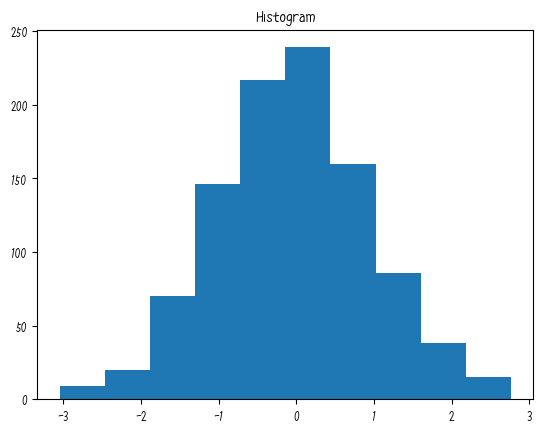

In [174]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patched = plt.hist(x, bins=10)

print(f'arrays : {arrays}')
print(f'bins : {bins}')
plt.show()

## 스캐터 플롯

    - scatter() 명령
    - 2차원 데이터 / 두 개의 실수 데이터 집합의 상관관계 
    - 3차원 혹은 4차원인 경우 점 하나의 크기 혹은 색깔을 이요하여 다른 데이터 값을 나타낼 수 있음. --> 버블 차트(Bubble Chart) / s:크기, c:색깔


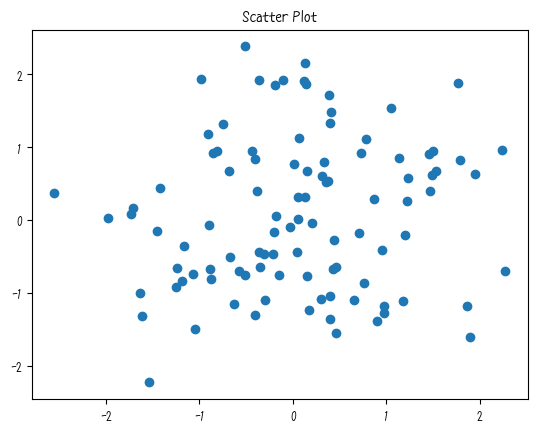

In [175]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

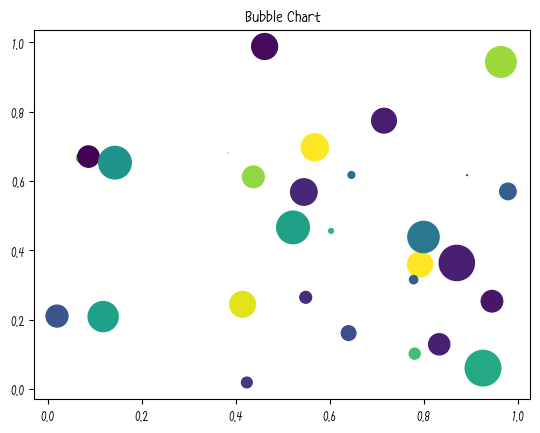

In [177]:
N = 30 
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2
plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)
plt.show()

# imshow

    - 화상(image) 데이터처럼 행과 열을 가진 행렬 형태의 2차원 데이터
    - 데이터 수치를 색으로 바꾸는 함수 : 칼라맵 cmap() => plt.cm의 속성으로 포함되어 있음

In [211]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.images[0]
x

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

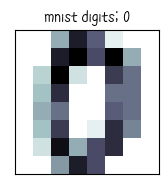

In [212]:
plt.title('mnist digits; 0')
plt.imshow(x, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

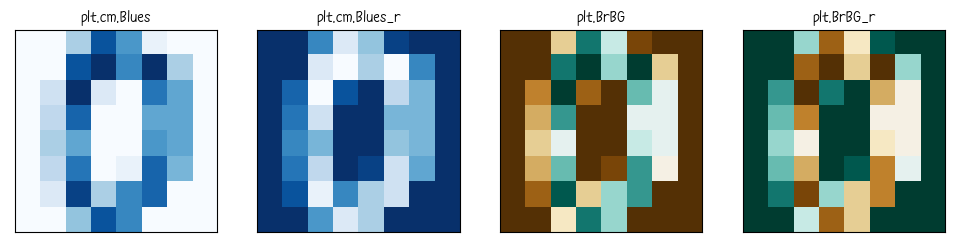

In [214]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), 
                         subplot_kw={'xticks': [], 'yticks': []})
axes[0].set_title("plt.cm.Blues")
axes[0].imshow(x, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title("plt.cm.Blues_r")
axes[1].imshow(x, interpolation='nearest', cmap=plt.cm.Blues_r)
axes[2].set_title("plt.BrBG")
axes[2].imshow(x, interpolation='nearest', cmap='BrBG')
axes[3].set_title("plt.BrBG_r")
axes[3].imshow(x, interpolation='nearest', cmap='BrBG_r')
plt.show() 

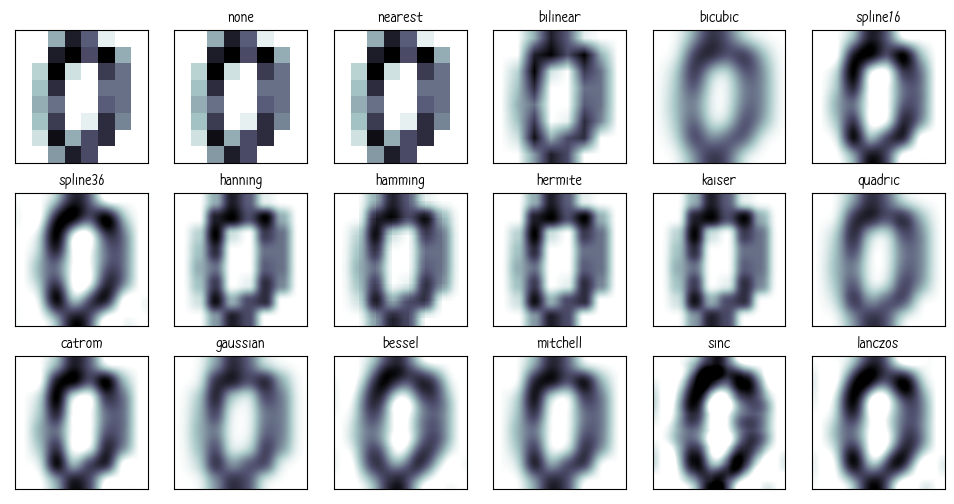

In [215]:
methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(x, cmap=plt.cm.bone_r, interpolation=interp_method)
    ax.set_title(interp_method)
plt.show()

## 컨투어 플롯

    - 명암이 아닌 등고선을 사용하여 시각화

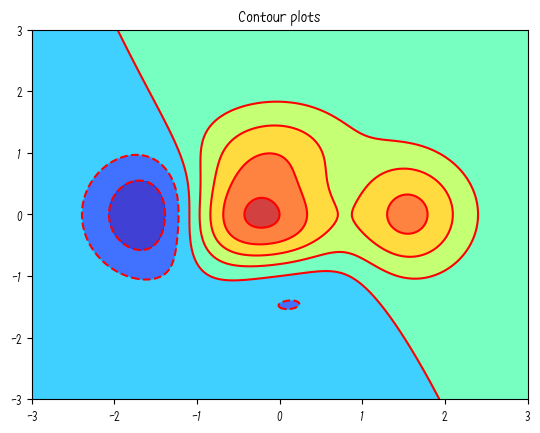

In [194]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
XX, YY = np.meshgrid(x, y)
ZZ = f(XX, YY)

plt.title("Contour plots")
plt.contourf(XX, YY, ZZ, alpha=.75, cmap='jet')
plt.contour(XX, YY, ZZ, colors='black')         # 등고선만 표시
plt.show()

## 3D 서피스 플롯

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_43540/245633225.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


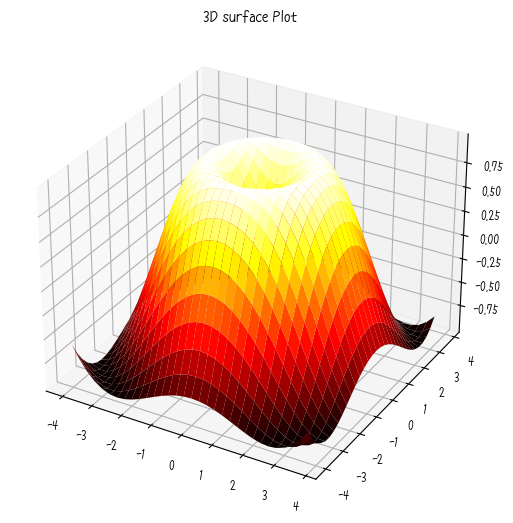

In [206]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(X, Y)
RR = np.sqrt(XX**2 + YY**2)
ZZ = np.sin(RR)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('3D surface Plot')
ax.plot_surface(XX, YY,ZZ, rstride = 1, cstride = 1, cmap = 'hot')
plt.show()

# Seaborn

    1. Seaborn이란
        - Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지임.
        - 시각화 기능은 Matplotlib 패키지, 통계 기능은 Statsmodels패키지에 의존

## 카운트 플롯
    - countplot(): 각 카테고리 값마다의 데이터가 얼마나 있는지 표시할 수 있음.
    - 카테고리별 히스토그램
    - set_theme(): global 범위의 테미를 적용해서 그래프를 쉽게 꾸밀 수 있음. / style과 palette 키워드 인수를 활용
        * style: darkgrid, witegrid, dark, white,ticks, ...
        * palette:pastel, husl, Spectral, flare, ...
    - 각 유니크한 값들이 몇 갸씩 있는지 시각적으로 확인할 수 있음. 

In [280]:
import seaborn as sns
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='class', ylabel='count'>

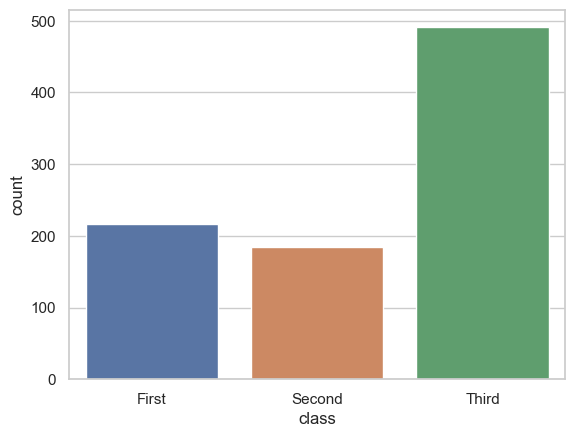

In [282]:
# 카운트 플롯
# value_counts()의 결과를 보듯한 바 차트를 볼 수 있음
df = sns.load_dataset("titanic")
sns.countplot(x=df["class"])        # df["class"] -> x 키워드 인수에 Series를 전달하여 해당 값을 유니크하게 가져와서 카운트한 결과를 가져옴.

## 카운트 플롯

    - hue 키워드 인수

<AxesSubplot:xlabel='class', ylabel='count'>

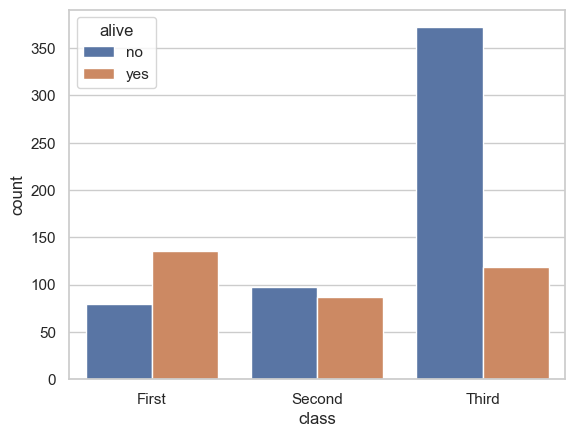

In [283]:
# 카운트 플롯 - hue 키워드
sns.countplot(data=df, x='class', hue='alive')      # hue 키워드 인수 : 'alive'라는 column을 추가하여 차원이 증가함.

## 카운트 플롯

    - data 키워드 인수

<AxesSubplot:xlabel='class', ylabel='count'>

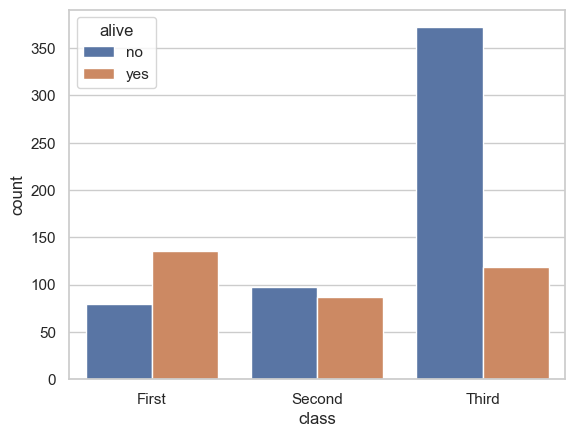

In [285]:
# 카운트 플롯 - data 키워드 인수
sns.countplot(data=df, x='class', hue='alive')      # data 키워드 인수에 DataFrame을 전달하고 x 키워드 인수에 DataFrame 중 매칭하고 싶은 column의 name값을 전달

# 카운트 플롯 

    - 수평 그래프


<AxesSubplot:xlabel='count', ylabel='deck'>

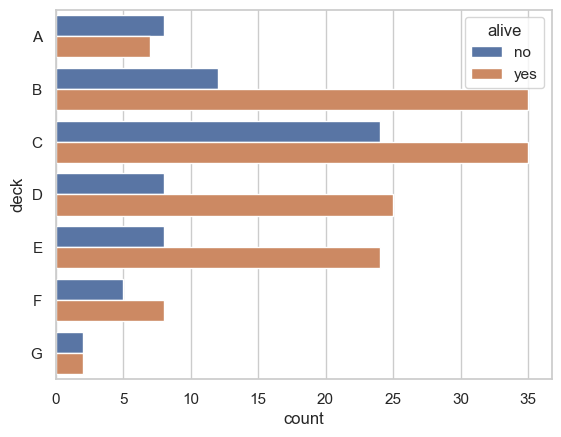

In [286]:
# 카운트 플롯 - 수평 그래프
sns.countplot(data=df, y="deck", hue='alive')       # y 키워드 인수에 column name값을 전달

## tips 데이터셋

*total_bill: 총 지불 금액($)
*tip: 팁($)
*sex: 성별
*smoker: 흡연 여부
*day: 요일
*time: 식사 시간대
*size: 식사 인원

In [291]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot()

    - 러그 플롯 : 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다
    - 커널 밀도()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

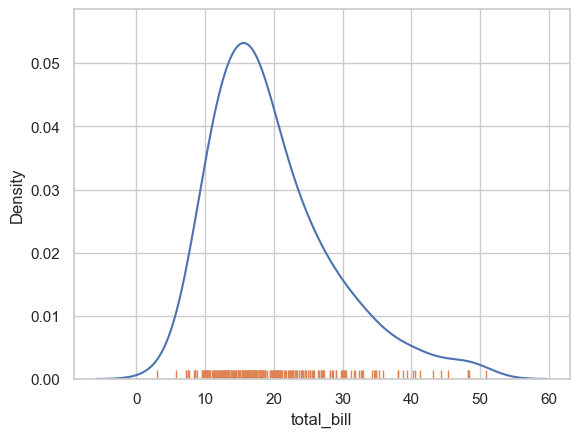

In [292]:
sns.kdeplot(data=tips, x='total_bill')
sns.rugplot(data=tips, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

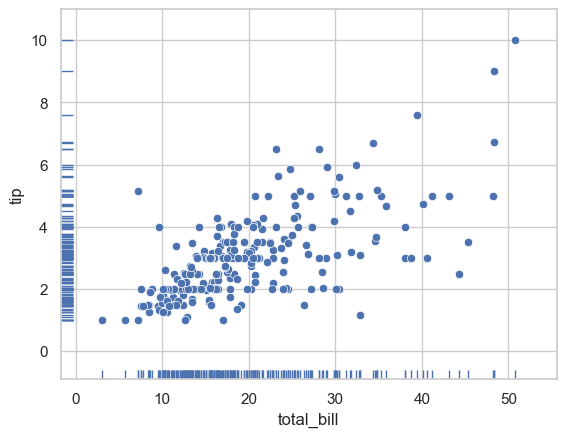

In [293]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip")

## rug plot

    - hue 키워드 인수

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

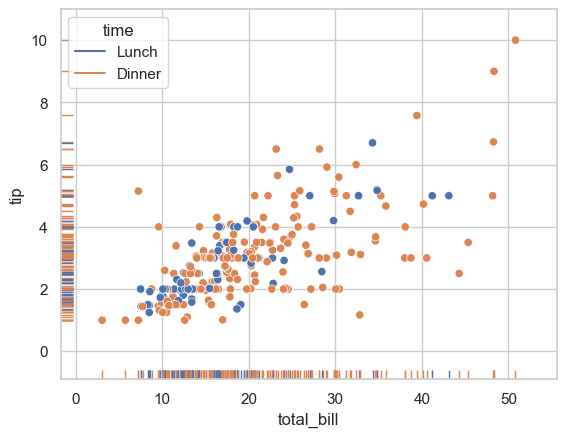

In [294]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time")

## rug plot

    - height 키워드 인수

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

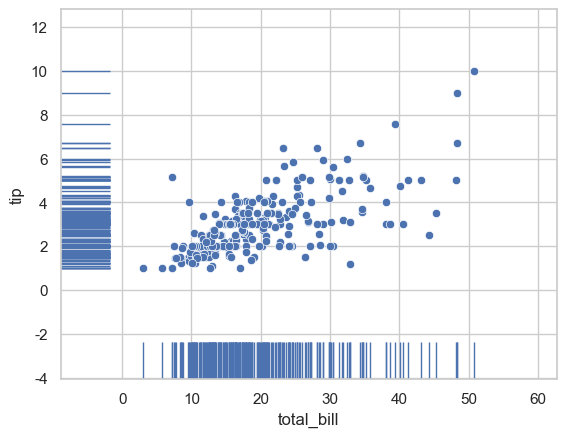

In [296]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=.1)

<AxesSubplot:xlabel='carat', ylabel='price'>

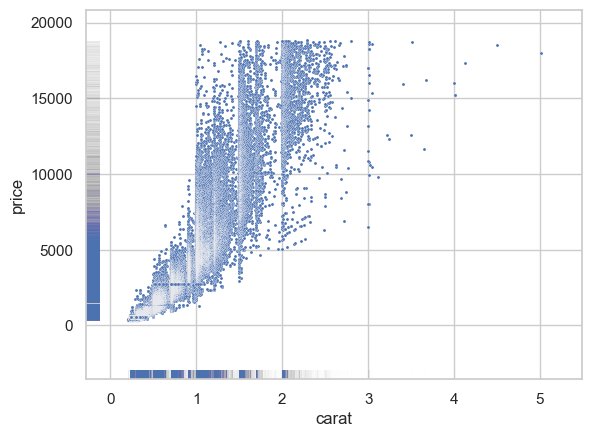

In [299]:
diamonds = sns.load_dataset("diamonds")
sns.scatterplot(data=diamonds,x="carat", y='price', s=5)
sns.rugplot(data=diamonds, x="carat", y='price', lw=1, alpha=.005)

## 히스토그램(Histogram)

    1. penguins dataset
        - species: 펭귄의 종(Chinstrap, Adélie, Gentoo)
        - culmen_length_mm: culmen length (mm)
        - culmen_depth_mm: culmen depth (mm)
        - flipper_length_mm: flipper length (mm)
        - body_mass_g: 체중(g)
        - island: 서식지 섬 (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
        - sex: 펭귄 성별

In [300]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [301]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [303]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## 히스토그램 - histplot() x축 기준

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

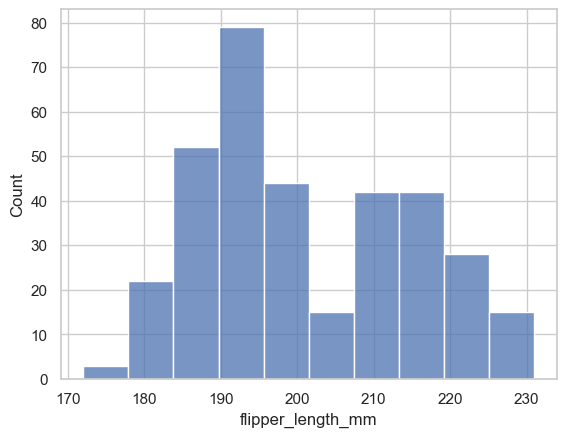

In [305]:
sns.histplot(data=penguins, x="flipper_length_mm")

## 히스토그램 - histplot() y축 기준

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

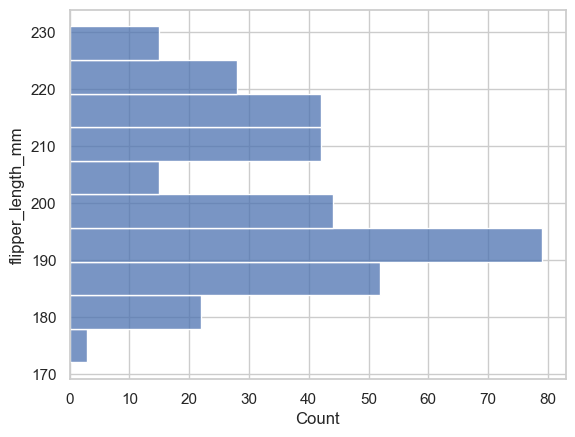

In [306]:
sns.histplot(data=penguins, y="flipper_length_mm")

## 히스토그램 - histplot() bin 너비 지정하기

    - binwidth 키워드 인수: bin의 너비를 지정할 수 있음.
    - bins 키워드 인수 : bin의 개수를 지정할 수 있음.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

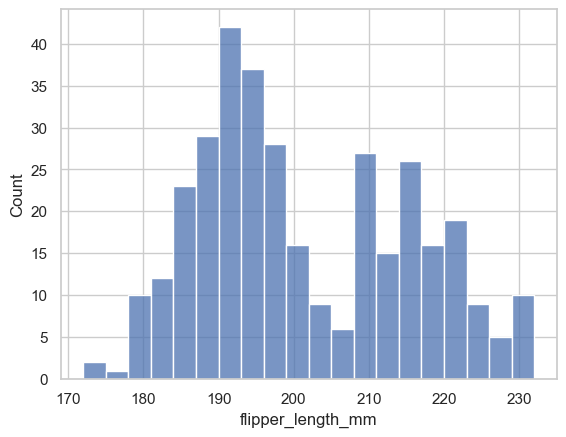

In [307]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

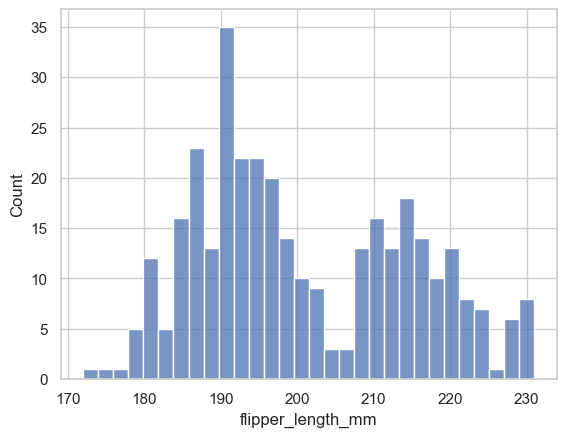

In [308]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

## 히스토그램 - histplot() kde를 동시에 표시하기

    - kde(kernel density): 커널이라는 함수를 겹치는 방법
    - 부드러운 형태의 분포 곡선을 보여줌.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

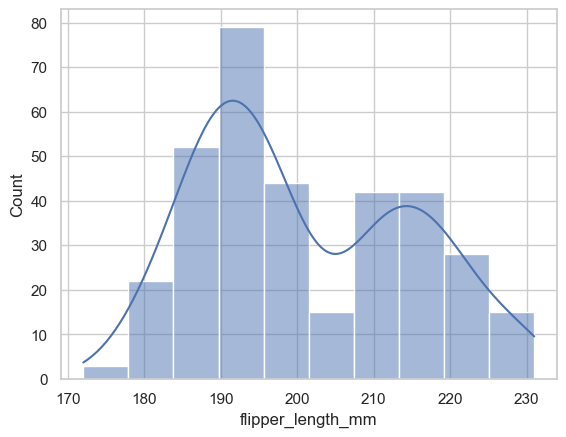

In [309]:
sns.histplot(data=penguins, x='flipper_length_mm', kde=True)

## 히스토그램 - histplot() hue 키워드 인수

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

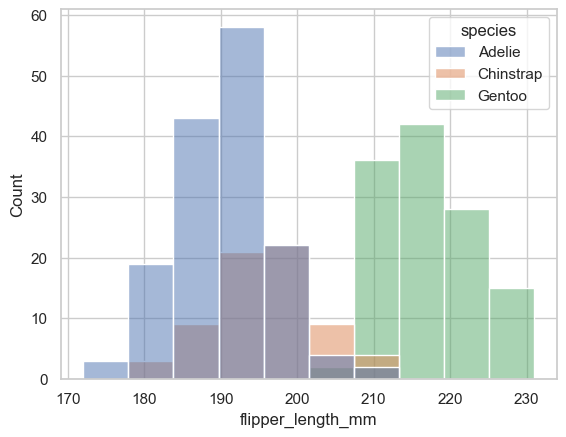

In [310]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

## 히스토그램 - histplot()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

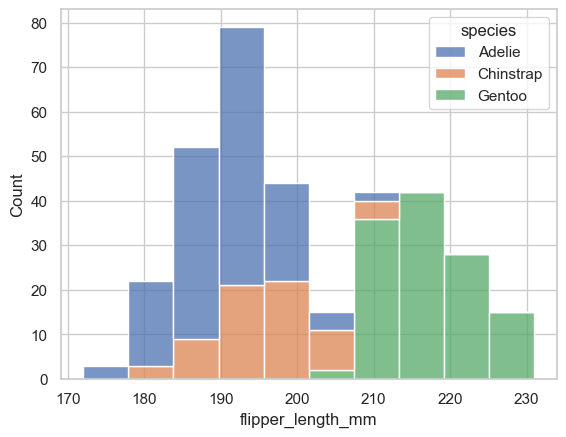

In [311]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species', multiple='stack')

## 히스토그램 - histplot()

    - step

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

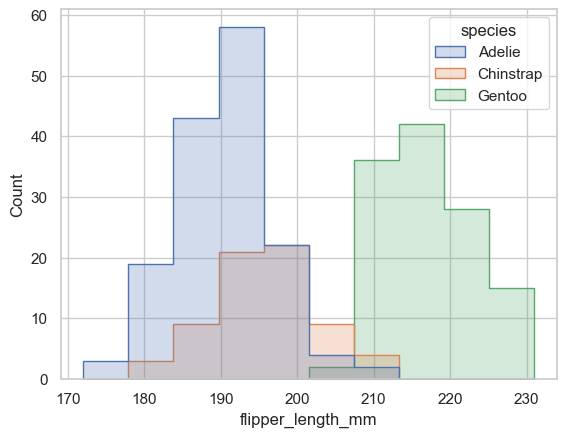

In [312]:
sns.histplot(penguins, x="flipper_length_mm", hue='species', element='step')

## 히스토그램 - histplot

    - poly
    - x축과 y축 모두 column을 할당하게 되면 히트맵 형태의 히스토그램을 표현할수 있음.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

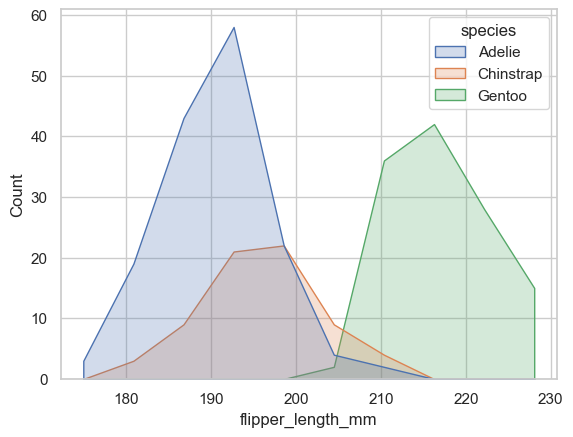

In [313]:
sns.histplot(penguins, x='flipper_length_mm', hue='species', element='poly')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

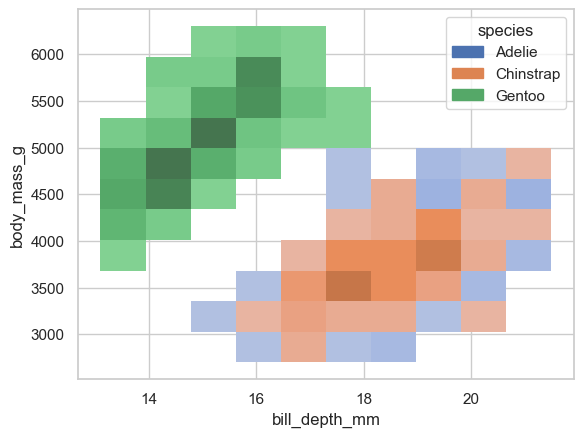

In [315]:
sns.histplot(penguins, x='bill_depth_mm', y='body_mass_g', hue='species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='species'>

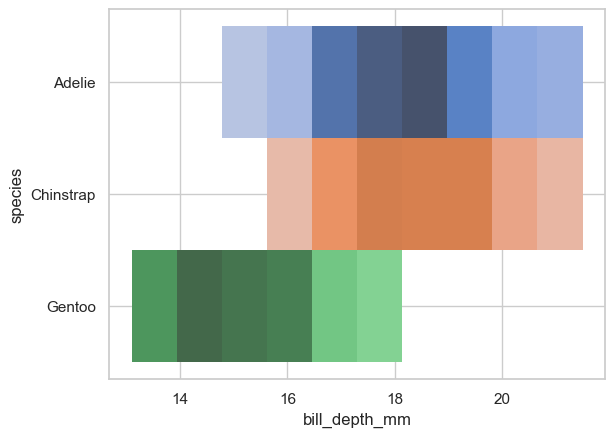

In [317]:
sns.histplot(
    penguins, x='bill_depth_mm', y='species', hue='species', legend=False
)

## 히스토그램 - displot()

    - displot(): 1차원 혹은 2차원 데이터의 분포를 히스토그램으로 보여줌.
    - rug와 kde에 대해 동시에 표현이 가능해서 표현 범위가 더 넓고 이에 따라 많이 사용됨.

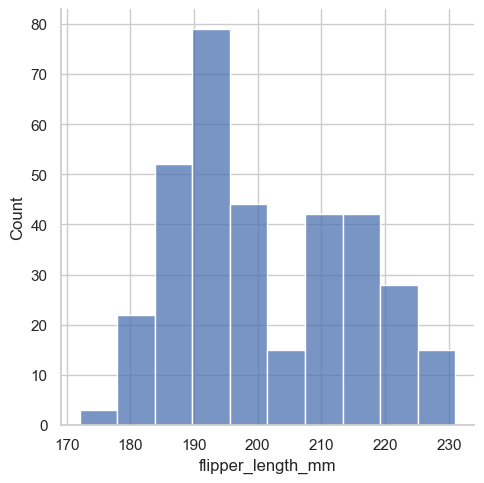

In [319]:
sns.displot(data=penguins, x='flipper_length_mm')

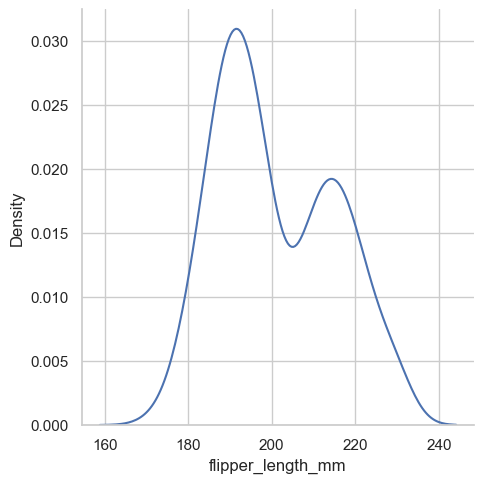

In [320]:
sns.displot(data=penguins, x='flipper_length_mm', kind='kde')

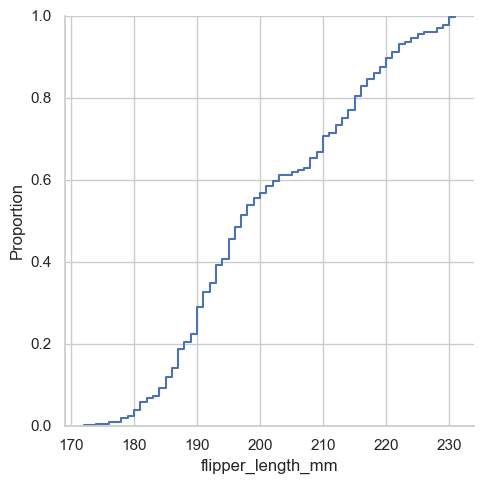

In [322]:
sns.displot(data=penguins, x='flipper_length_mm', kind='ecdf')

## 히스토그램 - displot()과 kde 동시에

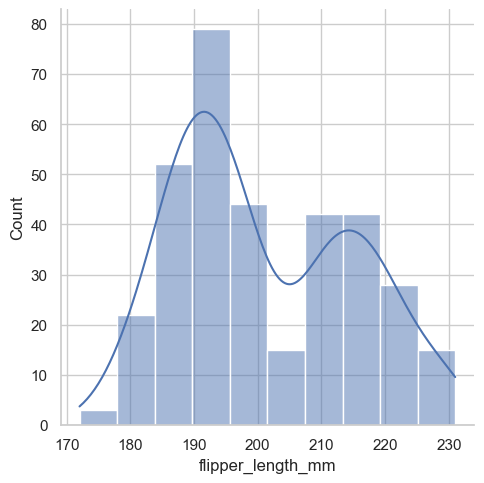

In [323]:
sns.displot(data=penguins, x='flipper_length_mm', kde=True)

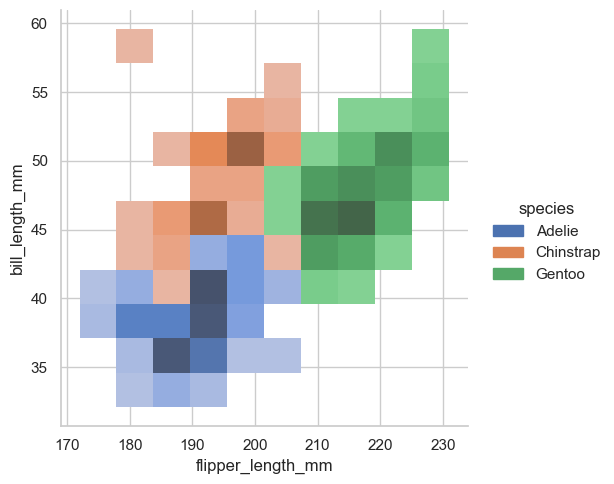

In [324]:
sns.displot(data=penguins, x='flipper_length_mm', y='bill_length_mm', hue='species')

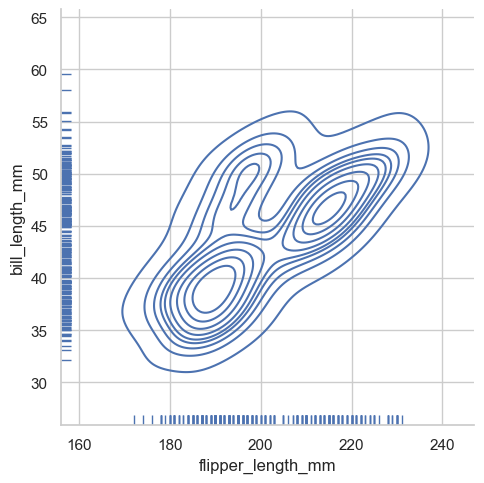

In [326]:
g = sns.displot(data=penguins, x='flipper_length_mm', y='bill_length_mm', kind='kde', rug=True)